In [1]:
import pandas as pd
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB# GaussianNB

In [3]:
TrnFlsPth=gb.glob("DTrain/*/*")
TstFlsPth=gb.glob("DTest/*/*")

In [4]:
Tr_lbl=[e.strip().split('\\')[1] for e in TrnFlsPth]
Ts_lbl=[e.strip().split('\\')[1] for e in TstFlsPth]
trl=[]
a={trl.append(e) for e in Tr_lbl if(e not in trl)}
tsl=[]
a={tsl.append(e) for e in Ts_lbl if(e not in tsl)}
a=None
print(trl, '\n', tsl)

['alum', 'barley', 'coffee', 'dmk', 'fuel', 'livestock', 'palm-oil', 'retail', 'soybean', 'veg-oil'] 
 ['alum', 'barley', 'coffee', 'dmk', 'fuel', 'livestock', 'palm-oil', 'retail', 'soybean', 'veg-oil']


In [5]:
le =LabelEncoder()
Y_Tr=le.fit_transform(Tr_lbl)
Y_Ts=le.fit_transform(Ts_lbl)

In [6]:
fpt=[open(f) for f in TrnFlsPth]
Trfob=[f.read().replace("\\",'').replace('//',' ').replace('/',' ') for f in fpt]
all(f.close() for f in fpt)

False

In [7]:
fpt=[open(f) for f in TstFlsPth]
Tsfob=[f.read().replace("\\",'').replace('//',' ').replace('/',' ') for f in fpt]
all(f.close() for f in fpt)
fpt=None

In [8]:
rd={'\n':' ','<':' ','>':' ','(':' ',')':' ','[':' ',']':' ','{':' ','}':' ','?':' ',  
    ':':' ', ",":'','.':' ', '|':' ', '_':' ', '||':' '}
#\

In [9]:
Trfob=[''.join([rd.get(c,c) for c in flob]) for flob in Trfob]
Tsfob=[''.join([rd.get(c,c) for c in flob]) for flob in Tsfob]

In [10]:
Trfob=[' '.join(flob.split()) for flob in Trfob]
Tsfob=[' '.join(flob.split()) for flob in Tsfob]

In [11]:
lm=WordNetLemmatizer()
ps=PorterStemmer()
Trfob=[' '.join([lm.lemmatize(word) for word in text.split(' ')]) for text in Trfob]
Tsfob=[' '.join([lm.lemmatize(word) for word in text.split(' ')]) for text in Tsfob]
Trfob=[' '.join([ps.stem(word) for word in text.split(' ')]) for text in Trfob]
Tsfob=[' '.join([ps.stem(word) for word in text.split(' ')]) for text in Tsfob]

In [12]:
Trfob[0]

"nippon light metal continu aluminium output cut tokyo march 2 - nippon light metal Co ltd nlgt T which ha annual capac of 63000 tonn will continu primari aluminium product at a rate of 35000 tonn owe to low domest and world price and low water suppli at it hydroelectr power plant a compani offici said nippon which ha no plan to restor output to the 48000 tonn a year at which it wa work until late 1986 will becom japan' onli smelter ryoka light metal industri ltd will stop smelt in april owe to high power cost and low price and mitsui aluminium Co ltd ha said it stop smelt in februari"

In [13]:
vc=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.3, min_df=1,
                   ngram_range=(1, 1), stop_words='english')
idft=TfidfTransformer()

In [14]:
TrDvcX=vc.fit_transform(Trfob)
TrDtvcX=idft.fit_transform(TrDvcX.toarray())
###############
TsDvcX=vc.transform(Tsfob)
TsDtvcX=idft.transform(TsDvcX.toarray())

In [15]:
TrDvc=pd.DataFrame(TrDvcX.toarray(), columns=vc.get_feature_names())
TrDtvc=pd.DataFrame(TrDtvcX.toarray(), columns=vc.get_feature_names())
###############
TsDvc=pd.DataFrame(TsDvcX.toarray(), columns=vc.get_feature_names())
TsDtvc=pd.DataFrame(TsDtvcX.toarray(), columns=vc.get_feature_names())

In [16]:
print(TrDvc.shape, TrDtvc.shape, TsDvc.shape, TsDtvc.shape)

(499, 5694) (499, 5694) (185, 5694) (185, 5694)


In [17]:
lex=['0','00','000','0000']
exstp=[fv for fv in TrDtvc if(len(fv)<3)]
stpwd=ENGLISH_STOP_WORDS.union(exstp,lex)
len(stpwd)

488

In [18]:
#########

In [19]:
clfb=BernoulliNB()
clfb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [20]:
evlp=['Precision_micro','Recall_micro','Precision_macro','Recall_macro','f1_micro',
     'f1_macro','Accuracy']
confp=['max df','min df','ngram','idf','no. token','alpha']
confg=[]
prf=[]

In [21]:
clfb.fit(TrDvc, Tr_lbl)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [22]:
y_pred=clfb.predict(TsDvc)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
print(a1,'\n',a2,'\n',a3,'\n',a4)

0.40540540540540543 
 0.40540540540540543 
 0.2955969974196575 
 0.2890985140985141


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))
confg.append(('0.3','1',"1 - 1",'No','5694','1'))

0.40540540540540543 
 0.26379339127019197 
 0.40540540540540543


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)

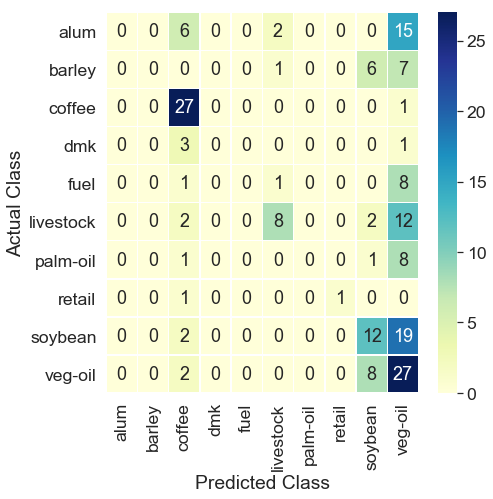

In [25]:
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
#plt.title('Confusion Matrix NBB_fig1')
plt.savefig('Fig/NBBcm1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [26]:
clfb.fit(TrDtvc, Tr_lbl) 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [27]:
y_pred=clfb.predict(TsDtvc)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
print(a1,'\n',a2,'\n',a3,'\n',a4)

0.40540540540540543 
 0.40540540540540543 
 0.2955969974196575 
 0.2890985140985141


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))
confg.append(('0.3','1',"1 - 1",'Yes','5694','1'))

0.40540540540540543 
 0.26379339127019197 
 0.40540540540540543


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)

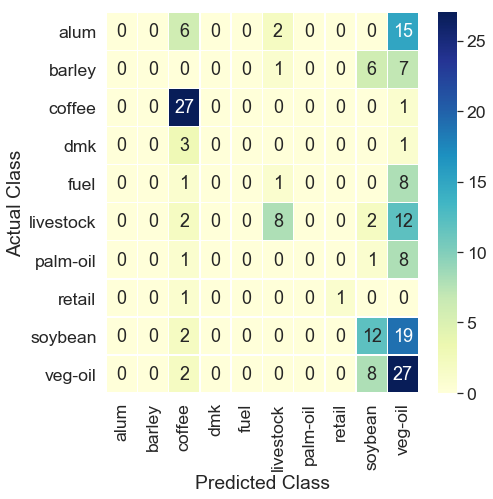

In [30]:
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, fmt="d", annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.savefig('Fig/NBBcm2.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [31]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/NBBconf1.csv')
stp

,max df,min df,ngram,idf,no. token,alpha
0,0.3,1,1 - 1,No,5694,1
1,0.3,1,1 - 1,Yes,5694,1


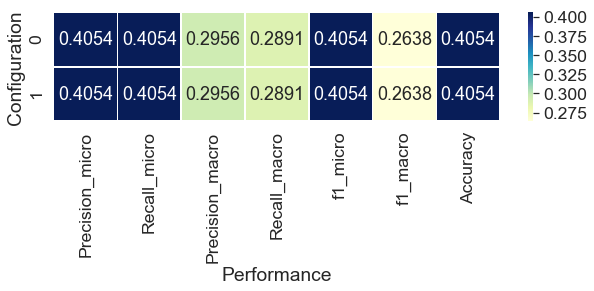

In [32]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBBprf1.csv')
plt.figure(figsize=(10,2))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBB_fig2')
plt.savefig('Fig/NBBprf1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [33]:
#ruk ruk################

In [34]:
prf=[]
clsfv=BernoulliNB()
clsfv

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [35]:
pipclf = Pipeline([('vct', vc), ('clf',clsfv)])#('idf', idft),

In [36]:
mxd=[ 0.3, 0.35, 0.4]
mid=[0.005,0.01, 0.05, 0.1,1]
ngm=[(1,1),(1,2),(1,3),(2,5),(1,7),(1,9),(1,12)]
c=[0.005,0.05,0.1,0.15,0.2,0.3,1,2,7,9]

In [37]:
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd],
       "clf__alpha":c
       }

In [38]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.05,
         ngram_range=(1, 12), preprocessor=None,
         stop_words=frozenset({'above', 'myself', 'i', 'x1', '37', 'eg', 'former', 'after', 'inc', 'get', 'it', '13', '27', 'seems', 'neither', 'nor', 'became', 'behind', '50', 'lb', 'next', 'more', '79', '57', 'what', 'either', 'nine', 'call', 'ek', '96', 'si', '11', 'aa', 'who', 'otherwise', 'front', 'much... 'into', '93', 'ii', 'we', 'rd', '32', 'yours', '83', 'sometimes', 'first', 'put', 'several', 'us'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': BernoulliNB(alpha=0.2, binarize=0.0, class_prior=None, fit_prior=True)}

In [40]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6054054054054054 
 0.6054054054054054 
 0.5668924619871324 
 0.6278349764219329 
 0.6054054054054054 
 0.5718623545016265 
 0.6054054054054054


In [41]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.01,
         ngram_range=(1, 3), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': BernoulliNB(alpha=0.15, binarize=0.0, class_prior=None, fit_prior=True)}

In [43]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6324324324324324 
 0.6324324324324324 
 0.6797140177074388 
 0.6195171710389101 
 0.6324324324324324 
 0.5917721927189095 
 0.6324324324324324


In [44]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.01,
         ngram_range=(1, 7), preprocessor=None,
         stop_words=frozenset({'above', 'myself', 'i', 'x1', '37', 'eg', 'former', 'after', 'inc', 'get', 'it', '13', '27', 'seems', 'neither', 'nor', 'became', 'behind', '50', 'lb', 'next', 'more', '79', '57', 'what', 'either', 'nine', 'call', 'ek', '96', 'si', '11', 'aa', 'who', 'otherwise', 'front', 'much... 'into', '93', 'ii', 'we', 'rd', '32', 'yours', '83', 'sometimes', 'first', 'put', 'several', 'us'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': BernoulliNB(alpha=0.2, binarize=0.0, class_prior=None, fit_prior=True)}

In [46]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6054054054054054 
 0.6054054054054054 
 0.5762114737114737 
 0.568280479802219 
 0.6054054054054054 
 0.5253194721025034 
 0.6054054054054054


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
#####ruk ruk############################

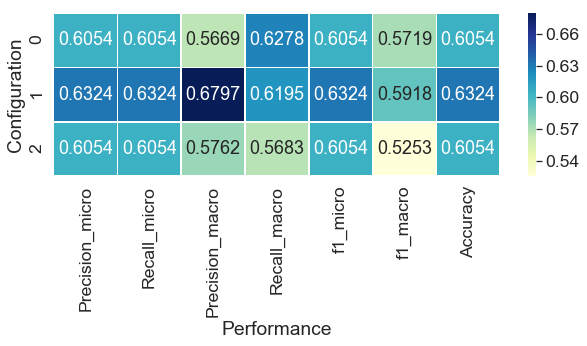

In [48]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBBprf2.csv')
plt.figure(figsize=(10,3))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBB_fig2')
plt.savefig('Fig/NBBprf2.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [49]:
#ruk ruk ################ ruk ruk##########################################

In [50]:
prf=[]
pipclf = Pipeline([('vct', vc), ('idf', idft), ('clf',clsfv)])#

In [51]:
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd],
       "clf__alpha":c
       }

In [52]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [53]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=0.01,
         ngram_range=(1, 12), preprocessor=None,
         stop_words=frozenset({'above', 'myself', 'i', 'x1', '37', 'eg', 'former', 'after', 'inc', 'get', 'it', '13', '27', 'seems', 'neither', 'nor', 'became', 'behind', '50', 'lb', 'next', 'more', '79', '57', 'what', 'either', 'nine', 'call', 'ek', '96', 'si', '11', 'aa', 'who', 'otherwise', 'front', 'much... 'into', '93', 'ii', 'we', 'rd', '32', 'yours', '83', 'sometimes', 'first', 'put', 'several', 'us'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)}

In [54]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6108108108108108 
 0.6108108108108108 
 0.6783566159870607 
 0.59938730090904 
 0.6108108108108108 
 0.5681068992328919 
 0.6108108108108108


In [55]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.01,
         ngram_range=(1, 3), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)}

In [57]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6378378378378379 
 0.6378378378378379 
 0.6728340941422062 
 0.6277855693073084 
 0.6378378378378379 
 0.604470450605127 
 0.6378378378378379


In [58]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_macro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_
clfrb.named_steps

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.01,
         ngram_range=(1, 12), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)}

In [59]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.01,
         ngram_range=(1, 12), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)}

In [60]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.5945945945945946 
 0.5945945945945946 
 0.5509623222781117 
 0.5695171710389102 
 0.5945945945945946 
 0.5223913468828723 
 0.5945945945945946


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_macro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_
clfrb.named_steps

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=0.005,
         ngram_range=(1, 1), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': BernoulliNB(alpha=0.005, binarize=0.0, class_prior=None, fit_prior=True)}

In [62]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=0.005,
         ngram_range=(1, 1), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': BernoulliNB(alpha=0.005, binarize=0.0, class_prior=None, fit_prior=True)}

In [63]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6216216216216216 
 0.6216216216216216 
 0.7448183595019044 
 0.5886870297739863 
 0.6216216216216216 
 0.616312959062427 
 0.6216216216216216


In [64]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [65]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=0.01,
         ngram_range=(1, 12), preprocessor=None,
         stop_words=frozenset({'above', 'myself', 'i', 'x1', '37', 'eg', 'former', 'after', 'inc', 'get', 'it', '13', '27', 'seems', 'neither', 'nor', 'became', 'behind', '50', 'lb', 'next', 'more', '79', '57', 'what', 'either', 'nine', 'call', 'ek', '96', 'si', '11', 'aa', 'who', 'otherwise', 'front', 'much... 'into', '93', 'ii', 'we', 'rd', '32', 'yours', '83', 'sometimes', 'first', 'put', 'several', 'us'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': BernoulliNB(alpha=0.005, binarize=0.0, class_prior=None, fit_prior=True)}

In [66]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6432432432432432 
 0.6432432432432432 
 0.6285384697884697 
 0.595380619184967 
 0.6432432432432432 
 0.589540502625609 
 0.6432432432432432


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


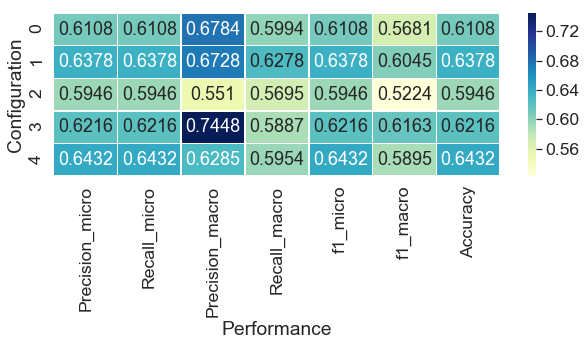

In [67]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBBprf3.csv')
plt.figure(figsize=(10,3))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBB_fig2')
plt.savefig('Fig/NBBprf3.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [68]:
###############################################

In [88]:
evlp=['Precision_micro','Recall_micro','Precision_macro','Recall_macro','f1_micro',
     'f1_macro','Accuracy']
confp=['max df','min df','ngram','idf','no. token','alpha']
confg=[]
prf=[]

In [89]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.4, min_df=0.01,
                   ngram_range=(1, 3), stop_words=stpwd)
idft1=TfidfTransformer()

In [90]:
TrDX=vc1.fit_transform(Trfob)
TrDtX=idft1.fit_transform(TrDX.toarray())
###############
TsDX=vc1.transform(Tsfob)
TsDtX=idft1.transform(TsDX.toarray())

In [91]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc1.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc1.get_feature_names())
###############
TsD=pd.DataFrame(TsDX.toarray(), columns=vc1.get_feature_names())
TsDt=pd.DataFrame(TsDtX.toarray(), columns=vc1.get_feature_names())

In [92]:
print(TrD.shape, TrDt.shape, TsD.shape, TsDt.shape)

(499, 2734) (499, 2734) (185, 2734) (185, 2734)


In [93]:
clfb=BernoulliNB(alpha=0.1)

In [94]:
clfb.fit(TrD, Tr_lbl)

BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)

In [95]:
y_pred=clfb.predict(TsD)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.6432432432432432 
 0.6432432432432432 
 0.684486986840479 
 0.6255236645454036 
 0.6432432432432432 
 0.5968281125600272 
 0.6432432432432432


In [96]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.4','0.01',"1 - 2",'No','2734','0.3'))

In [97]:
clfb.fit(TrDt, Tr_lbl)

BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)

In [98]:
y_pred=clfb.predict(TsDt)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.6432432432432432 
 0.6432432432432432 
 0.684486986840479 
 0.6255236645454036 
 0.6432432432432432 
 0.5968281125600272 
 0.6432432432432432


In [99]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.4','0.01',"1 - 2",'Yes','2734','0.3'))

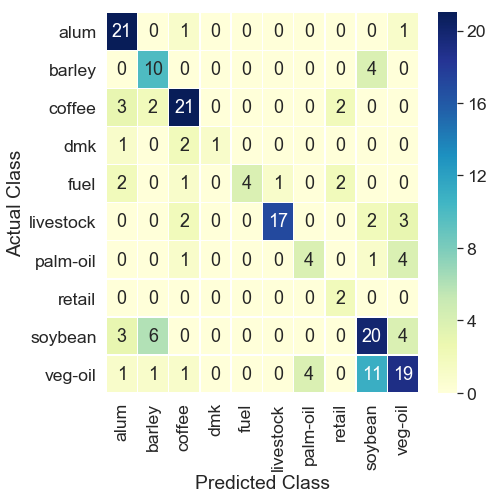

In [100]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
#plt.title('Confusion Matrix NBB_fig1')
plt.savefig('Fig/NBBcm3.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [101]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/NBBconf2.csv')
stp

,max df,min df,ngram,idf,no. token,alpha
0,0.4,0.01,1 - 2,No,2439,0.3
1,0.4,0.01,1 - 2,Yes,2734,0.3


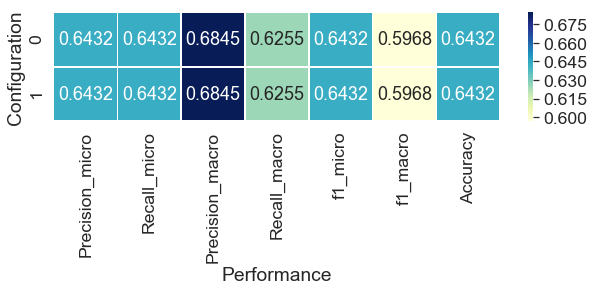

In [102]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBBprf4.csv')
plt.figure(figsize=(10,2))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBB_fig2')
plt.savefig('Fig/NBBprf4.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [103]:
#ruk#################ruk

In [104]:
cvp=['1','2','3','4','5','6','7','8','9','10','Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clfb, TrD, Tr_lbl, cv=10, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/10)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('10')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clfb, TrD, Tr_lbl, cv=10, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/10)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('10')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/NBBcvpf110.csv')
rsl
#print(len(sr1),len(sr2))

[0.6852, 0.6981, 0.7358, 0.6471, 0.6863, 0.7347, 0.6735, 0.6596, 0.7609, 0.5652, 0.684630547258243, 'f1 micro', '10'] 
 Average Score : 0.684630547258243


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.7198, 0.6576, 0.6659, 0.717, 0.7023, 0.6476, 0.6971, 0.6126, 0.7722, 0.5863, 0.6778250596302489, 'f1 macro', '10'] 
 Average Score : 0.6778250596302489


,1,2,3,4,5,6,7,8,9,10,Average,metric,cv fold
0,0.6852,0.6981,0.7358,0.6471,0.6863,0.7347,0.6735,0.6596,0.7609,0.5652,0.684631,f1 micro,10
1,0.7198,0.6576,0.6659,0.7170,0.7023,0.6476,0.6971,0.6126,0.7722,0.5863,0.677825,f1 macro,10


In [105]:
cvp=['1','2','3','4','5','6','7','8','9','10','Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clfb, TrDt, Tr_lbl, cv=10, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/10)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('10')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clfb, TrDt, Tr_lbl, cv=10, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/10)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('10')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/NBBcvpf110t.csv')
rsl
#print(len(sr1),len(sr2))

[0.6852, 0.6981, 0.7358, 0.6471, 0.6863, 0.7347, 0.6735, 0.6596, 0.7609, 0.5652, 0.684630547258243, 'f1 micro', '10'] 
 Average Score : 0.684630547258243


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.7198, 0.6576, 0.6659, 0.717, 0.7023, 0.6476, 0.6971, 0.6126, 0.7722, 0.5863, 0.6778250596302489, 'f1 macro', '10'] 
 Average Score : 0.6778250596302489


,1,2,3,4,5,6,7,8,9,10,Average,metric,cv fold
0,0.6852,0.6981,0.7358,0.6471,0.6863,0.7347,0.6735,0.6596,0.7609,0.5652,0.684631,f1 micro,10
1,0.7198,0.6576,0.6659,0.7170,0.7023,0.6476,0.6971,0.6126,0.7722,0.5863,0.677825,f1 macro,10


In [106]:
cvp=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
    'Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clfb, TsDt, Ts_lbl, cv=20, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/20)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('20')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clfb, TsDt, Ts_lbl, cv=20, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/20)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('20')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/NBBcvpf120.csv')
rsl
#print(len(sr1),len(sr2))

c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[0.5333, 0.6, 0.5, 0.5385, 0.3636, 0.3636, 0.6364, 0.7273, 0.5, 0.6, 0.75, 0.75, 0.375, 0.5714, 0.6667, 0.3333, 0.6667, 0.4, 0.8, 1.0, 0.5837899600399601, 'f1 micro', '20'] 
 Average Score : 0.5837899600399601


c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\skl

[0.55, 0.4871, 0.3598, 0.4259, 0.2708, 0.2296, 0.6, 0.75, 0.3852, 0.4792, 0.6111, 0.75, 0.2245, 0.4524, 0.56, 0.3333, 0.6333, 0.3333, 0.7333, 1.0, 0.508449357520786, 'f1 macro', '20'] 
 Average Score : 0.508449357520786


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarni

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,Average,metric,cv fold
0,0.5333,0.6000,0.5000,0.5385,0.3636,0.3636,0.6364,0.7273,0.5000,0.6000,...,0.5714,0.6667,0.3333,0.6667,0.4000,0.8000,1.0,0.583790,f1 micro,20
1,0.5500,0.4871,0.3598,0.4259,0.2708,0.2296,0.6000,0.7500,0.3852,0.4792,...,0.4524,0.5600,0.3333,0.6333,0.3333,0.7333,1.0,0.508449,f1 macro,20
